<a href="https://colab.research.google.com/github/Recorder08/Recorder08.github.io/blob/master/aix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


#데이터 준비 및 분석 단계

In [6]:
# 데이터 분석 준비 및 import

import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-colorblind')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [7]:
# 데이터 로딩
challenger_df = pd.read_csv('/content/gdrive/MyDrive/Challenger_Ranked_Games.csv')

In [ ]:
print(challenger_df.columns.values)

['gameId' 'gameDuraton' 'blueWins' 'blueFirstBlood' 'blueFirstTower'
 'blueFirstBaron' 'blueFirstDragon' 'blueFirstInhibitor' 'blueDragonKills'
 'blueBaronKills' 'blueTowerKills' 'blueInhibitorKills' 'blueWardPlaced'
 'blueWardkills' 'blueKills' 'blueDeath' 'blueAssist'
 'blueChampionDamageDealt' 'blueTotalGold' 'blueTotalMinionKills'
 'blueTotalLevel' 'blueAvgLevel' 'blueJungleMinionKills'
 'blueKillingSpree' 'blueTotalHeal' 'blueObjectDamageDealt' 'redWins'
 'redFirstBlood' 'redFirstTower' 'redFirstBaron' 'redFirstDragon'
 'redFirstInhibitor' 'redDragonKills' 'redBaronKills' 'redTowerKills'
 'redInhibitorKills' 'redWardPlaced' 'redWardkills' 'redKills' 'redDeath'
 'redAssist' 'redChampionDamageDealt' 'redTotalGold' 'redTotalMinionKills'
 'redTotalLevel' 'redAvgLevel' 'redJungleMinionKills' 'redKillingSpree'
 'redTotalHeal' 'redObjectDamageDealt']


In [ ]:
# 데이터 미리보기
challenger_df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141


In [ ]:
challenger_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [ ]:
challenger_df.describe()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,2.690400e+04,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,4.171927e+09,1448.653657,0.500074,0.503531,0.525610,0.244090,0.406334,0.367120,1.389719,0.307018,4.397562,0.619871,58.640351,22.330137,24.189414,24.180568,39.986396,69746.341882,48169.129906,520.446588,65.024234,13.004847,129.586939,5.554193,25050.636225,38393.883066,0.499926,0.494462,0.462719,0.266615,0.503531,0.348536,1.563857,0.336307,4.255910,0.584932,58.832255,21.912095,24.101175,24.268585,39.800736,69528.259441,48207.976398,526.337682,65.213165,13.042633,130.468704,5.541704,25505.503085,37648.115336
std,7.479506e+07,422.577288,0.500009,0.499997,0.499353,0.429554,0.491157,0.482029,1.247393,0.537140,3.327761,0.901444,31.351606,15.502273,12.954288,13.042858,27.770103,35763.374883,15476.235577,175.971130,14.062380,2.812476,64.662998,3.493384,15112.644802,26335.664719,0.500009,0.499979,0.498617,0.442197,0.499997,0.476515,1.299117,0.559479,3.325612,0.870919,31.621680,15.275608,13.024843,12.972992,27.722135,35866.105905,15627.093121,178.994313,14.105689,2.821138,64.618529,3.494662,15330.689295,26509.187910
min,3.482433e+09,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3704.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.142427e+09,1152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43205.250000,37191.000000,409.000000,56.000000,11.200000,90.000000,3.000000,14105.500000,15608.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,10.000000,15.000000,15.000000,20.000000,43068.250000,37127.250000,412.000000,56.000000,11.200000,91.000000,3.000000,14499.750000,14454.000000
50%,4.190657e+09,1435.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,36.000000,65013.000000,48104.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21990.000000,34940.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64655.000000,48037.000000,541.000000,66.000000,13.200000,132.000000,5.000000,22377.000000,33385.000000
75%,4.219650e+09,1738.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.

In [ ]:
challenger_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,26904.0,4.171927e+09,7.479506e+07,3.482433e+09,4.142427e+09,4.190657e+09,4.219650e+09,4.261026e+09
gameDuraton,26904.0,1.448654e+03,4.225773e+02,1.900000e+02,1.152000e+03,1.435000e+03,1.738000e+03,3.301000e+03
blueWins,26904.0,5.000743e-01,5.000093e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueFirstBlood,26904.0,5.035311e-01,4.999968e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueFirstTower,26904.0,5.256096e-01,4.993530e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueFirstBaron,26904.0,2.440901e-01,4.295544e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
blueFirstDragon,26904.0,4.063336e-01,4.911574e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueFirstInhibitor,26904.0,3.671201e-01,4.820286e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueDragonKills,26904.0,1.389719e+00,1.247393e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
blueBaronKills,26904.0,3.070175e-01,5.371399e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00


In [ ]:
# missing value가 있는지 확인 
# 확인결과 : 없음
challenger_df.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

#feature 분포 확인

In [3]:
# 시각화 패키지 import
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#블루팀이 이겼을때 블루팀과 레드팀 총 골드량

In [ ]:
features = ['blueTotalGold','redTotalGold']

In [ ]:
list(challenger_df.loc[challenger_df['blueWins'] == 1, features])

['blueTotalGold', 'redTotalGold']

In [ ]:
bluewin = challenger_df.loc[challenger_df['blueWins'] == 1, features].mean()

In [ ]:
bluewin

blueTotalGold    52447.299985
redTotalGold     43977.909915
dtype: float64

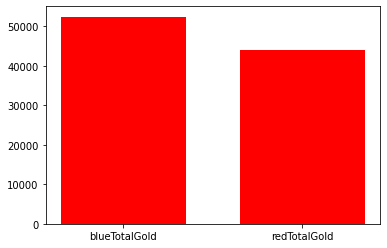

In [ ]:
y = [bluewin[0],bluewin[1]]
x = ['blueTotalGold', 'redTotalGold']
plt.bar(x, y, width=0.7,color='r')
plt.show()

#블루팀과 레드팀의 평균 드래곤 획득량


In [ ]:
features = ['blueDragonKills','redDragonKills']

In [ ]:
list(challenger_df.loc[challenger_df['blueWins'] == 1, features])

['blueDragonKills', 'redDragonKills']

In [ ]:
bluewin = challenger_df.loc[challenger_df['blueWins'] == 1, features].mean()

In [ ]:
bluewin

blueDragonKills    1.971458
redDragonKills     0.956741
dtype: float64

In [ ]:
redwin = challenger_df.loc[challenger_df['redWins'] == 1, features].mean()

In [ ]:
redwin

blueDragonKills    0.807807
redDragonKills     2.171152
dtype: float64

In [ ]:
redwin[1]

2.171152416356877

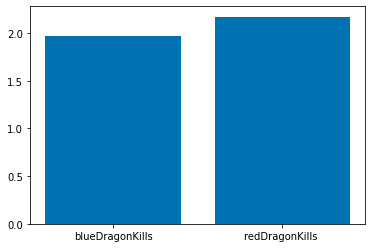

In [ ]:
x = np.arange(2)
team = ['blueDragonKills', 'redDragonKills ']
values = [bluewin[0], redwin[1]]

plt.bar(x, values)
plt.xticks(x, team)
plt.show()

각 팀이 이겼을때의 평균 드래곤의 수는 red팀이 많았고 각팀이 졌을때의 드래곤 수 또한 red 팀이 많았다 따라서 승패에 상관없이 red 팀이 드래곤을 챙기기에 유리한 것으로 보인다.

#블루팀의 킬수가 레드팀 킬수보다 높을때 블루팀이 이겼는지 졌는지 확인


In [9]:
features = ['blueWins','redWins']

In [10]:
list(challenger_df.loc[challenger_df['blueKills'] > challenger_df['redKills'], features])

['blueWins', 'redWins']

In [13]:
bluewin = challenger_df.loc[challenger_df['blueKills'] > challenger_df['redKills'], features].mean()

In [14]:
bluewin

blueWins    0.948803
redWins     0.051197
dtype: float64

블루팀의 킬이 레드팀의 킬보다 많을때 블루팀이 이길 확률 약 94%

산점도 그리기 킬과 승리가 산점도가 그려질까?

In [ ]:
import pandas as pd

blue_kill = challenger_df['blueKills']
blue_win = challenger_df['blueWins']

# DataFrame 만들기

body = pd.DataFrame(
    {'blue_kill': blue_kill, 'blue_win': blue_win}
)

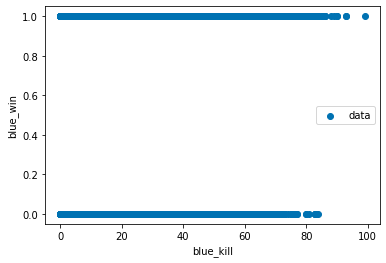

In [ ]:
import matplotlib.pylab as plt

plt.scatter( body['blue_kill'], body['blue_win'], label = "data")

plt.legend(loc = "best")
plt.xlabel('blue_kill')
plt.ylabel('blue_win')
plt.show()

킬과 승의 상관관계를 승 패 산점도로 보는건 불가 제가 이해 못한걸수도 있음

총딜량 킬수 산점도

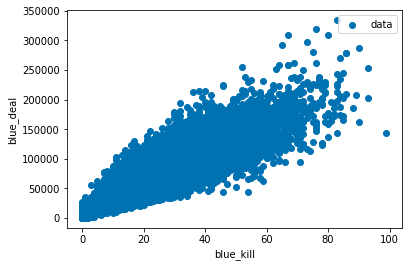

In [ ]:
blue_kill = challenger_df['blueKills']
blue_deal = challenger_df['blueChampionDamageDealt']
body = pd.DataFrame(
    {'blue_kill': blue_kill, 'blue_deal': blue_deal}
)
plt.scatter( body['blue_kill'], body['blue_deal'], label = "data")

plt.legend(loc = "best")
plt.xlabel('blue_kill')
plt.ylabel('blue_deal')
plt.show()

킬수가 늘어날 수록 딜량이 높아지는 상관관계

# 게임에 영향을 줄거로 생각되는 특정 feature를 뽑기
gameDuration : 시간 별로 승패에 영향주는 요소가 달라질 수도 있음
Red/Blue : 진영 별 유불리

FirstBlood 
FirstBaron 
FirstDragon
Firstinhibitor
Kill/Death/Assist - KDA로 통합하여 한 feature로 만들기 
 
Total gold
Avglevel
ChampionDamageDealt 

wardplaced-wardkills (시야) 

골드량 킬 바론 정도만 볼 수 있도록 bluWins== 1  이면 블루승

In [ ]:
# 승패에 높은 영향을 끼칠거라 생각되는 feature만 뽑아 새로운 df에 저장 
test_df = challenger_df[[ 'blueTotalGold', 'blueKills', 'blueDragonKills', 'redTotalGold', 'redKills', 'redDragonKills','blueWins']]


In [ ]:
test_df

,blueTotalGold,blueKills,blueDragonKills,redTotalGold,redKills,redDragonKills,blueWins
0,37001,15,0,49832,31,3,0
1,41072,19,2,37136,8,0,1
2,22929,5,0,35364,20,2,0
3,63447,26,1,70528,36,3,0
4,74955,27,2,74596,40,3,1
...,...,...,...,...,...,...,...
26899,41437,24,1,46558,27,2,0
26900,61221,29,3,70177,40,0,0
26901,45013,14,1,48849,20,1,0
26902,58160,32,3,52625,19,2,1


In [ ]:
bluewin_y = test_df['blueWins']

In [ ]:
# 데이터 내에서 학습 데이터와 테스트 데이터를 (8:2) 비율로 분리한다.
X_train, X_test, Y_train, Y_test = train_test_split(test_df, bluewin_y, test_size=.2,random_state=12)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((21523, 7), (21523,), (5381, 7), (5381,))

In [ ]:
X_train

,blueTotalGold,blueKills,blueDragonKills,redTotalGold,redKills,redDragonKills,blueWins
25987,34361,14,1,43010,25,1,0
17601,41401,26,1,36058,18,0,1
6993,70961,54,2,61009,29,1,1
14967,53685,18,2,47515,13,2,1
2185,41224,14,3,52876,31,1,0
...,...,...,...,...,...,...,...
7409,65686,35,4,59187,29,1,1
19709,75574,40,2,83105,52,4,0
25990,35464,29,1,22164,9,0,1
5787,40330,12,0,46760,23,3,0


In [ ]:
Y_train

25987    0
17601    1
6993     1
14967    1
2185     0
        ..
7409     1
19709    0
25990    1
5787     0
14155    0
Name: blueWins, Length: 21523, dtype: int64

#기계학습




In [ ]:

# 기계 학습 관련 import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # 이산형이 아닌 연속형에 대한
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [ ]:
# Support Vector Machines
# SVM 모델 학습
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

97.7

In [ ]:
#k-Nearest Neighbor
knn  = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

97.42

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

98.55

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

100.0

In [ ]:
# #Artificial Neural Network

# ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(30, 10), random_state=1)
# ANN.fit(X_train, Y_train)
# Y_pred_ANN = ANN.predict(X_test)
# acc_ANN = round(ANN.score(X_test, Y_test) * 100, 2)
# acc_ANN

#keras ann model 을 통한 블루팀 승리 예측 
블루가 승리하면 레드는 패배이고, 롤 이라는 게임의 특성상 무승부는 존재하지 않기때문에 블루팀이 이겼는지 졌는지만 예측하기로 함
 

In [ ]:
# keras import
from keras import layers, models, datasets
from keras.utils import np_utils

In [ ]:
def plot(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

relu, sigmoid 활성화함수 사용
adam 확률적 경사 하강법 손실함수를 사용하여 손실률을 최적화\
apoch= 40
evaluate batch size = 32
predict batch size = 128

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=7))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))       
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=40,
        batch_size=32, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size=32)
classes = model.predict(X_test, batch_size=128)
performance_test

Epoch 1/40
539/539 [==============================] - 2s 3ms/step - loss: 191.0570 - accuracy: 0.9113 - val_loss: 21.9678 - val_accuracy: 0.9614
Epoch 2/40
539/539 [==============================] - 2s 3ms/step - loss: 25.1849 - accuracy: 0.9541 - val_loss: 4.6085 - val_accuracy: 0.9568
Epoch 3/40
539/539 [==============================] - 1s 3ms/step - loss: 8.0565 - accuracy: 0.9589 - val_loss: 0.1911 - val_accuracy: 0.9828
Epoch 4/40
539/539 [==============================] - 1s 3ms/step - loss: 2.8117 - accuracy: 0.9512 - val_loss: 0.0663 - val_accuracy: 0.9807
Epoch 5/40
539/539 [==============================] - 2s 3ms/step - loss: 1.8023 - accuracy: 0.9491 - val_loss: 0.0655 - val_accuracy: 0.9800
Epoch 6/40
539/539 [==============================] - 1s 3ms/step - loss: 0.8662 - accuracy: 0.9391 - val_loss: 0.0989 - val_accuracy: 0.9526
Epoch 7/40
539/539 [==============================] - 1s 3ms/step - loss: 0.5682 - accuracy: 0.9459 - val_loss: 0.0808 - val_accuracy: 0.9789
Ep

[0.08792910724878311, 0.9750975370407104]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classes2_list = classes.tolist()
model_keras_ANN = []
for i in classes2_list:
    model_keras_ANN.append(round(i[0]))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32)

print('\n테스트 정확도:', test_acc)

169/169 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9751

테스트 정확도: 0.9750975370407104


#모델검증

In [ ]:
#report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ANN, digits=4))

ValueError: ignored

패배의 경우 98퍼센트로 예측하고 승리의 경우 88퍼센트로 예측하는것을 알 수 있다.

# 더 정확하게 딜량 추가


In [ ]:
# 필요한 feature만 뽑아 새로운 df에 저장 # 딜량 추가
test_df = challenger_df[[ 'blueChampionDamageDealt','blueTotalGold', 'blueKills', 'redChampionDamageDealt','redTotalGold', 'redKills','blueWins']]

In [ ]:
# 데이터 내에서 학습 집합과 테스트 집합을 나눔(8:2)
X_train, X_test, y_train, y_test = train_test_split(test_df, bluewin_y, test_size=.2,random_state=12)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((21523, 7), (21523,), (5381, 7), (5381,))

In [ ]:
test_df

,blueChampionDamageDealt,blueTotalGold,blueKills,redChampionDamageDealt,redTotalGold,redKills,blueWins
0,56039,37001,15,73016,49832,31,0
1,60243,41072,19,44218,37136,8,1
2,24014,22929,5,30797,35364,20,0
3,101607,63447,26,125866,70528,36,0
4,134826,74955,27,131536,74596,40,1
...,...,...,...,...,...,...,...
26899,99418,41437,24,75531,46558,27,0
26900,61816,61221,29,99837,70177,40,0
26901,51604,45013,14,55214,48849,20,0
26902,93059,58160,32,88366,52625,19,1


In [ ]:
bluewin_y = test_df['blueWins']

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=7))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))       
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=40,
        batch_size=32, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size=32)
classes = model.predict(X_test, batch_size=128)
performance_test

Epoch 1/40
539/539 [==============================] - 2s 3ms/step - loss: 325.6296 - accuracy: 0.8651 - val_loss: 4.3312 - val_accuracy: 0.9631
Epoch 2/40
539/539 [==============================] - 1s 3ms/step - loss: 20.8706 - accuracy: 0.9178 - val_loss: 0.5862 - val_accuracy: 0.9405
Epoch 3/40
539/539 [==============================] - 2s 3ms/step - loss: 5.8165 - accuracy: 0.9100 - val_loss: 0.2494 - val_accuracy: 0.9080
Epoch 4/40
539/539 [==============================] - 1s 3ms/step - loss: 2.4924 - accuracy: 0.9021 - val_loss: 0.2261 - val_accuracy: 0.9294
Epoch 5/40
539/539 [==============================] - 1s 3ms/step - loss: 1.6829 - accuracy: 0.8980 - val_loss: 0.2031 - val_accuracy: 0.9352
Epoch 6/40
539/539 [==============================] - 2s 3ms/step - loss: 0.8039 - accuracy: 0.8975 - val_loss: 0.2000 - val_accuracy: 0.9340
Epoch 7/40
539/539 [==============================] - 1s 3ms/step - loss: 0.7530 - accuracy: 0.8975 - val_loss: 0.1603 - val_accuracy: 0.9329
Epo

[0.0974956601858139, 0.9604162573814392]

In [ ]:
classes2_list = classes.tolist()
model_keras_ANN = []
for i in classes2_list:
    model_keras_ANN.append(round(i[0]))

In [ ]:
#report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ANN, digits=4))

NameError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32)

print('\n테스트 정확도:', test_acc)

169/169 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9604

테스트 정확도: 0.9604162573814392


In [ ]:
h = pd.DataFrame(history.history)
ax = h.plot(x="index", y=["loss", "val_loss"])
ax.set_ylabel("loss")
ax2 = ax.twinx()
ax2.set_ylabel("acc")
h.plot(x="index", y=["acc", "val_acc"], ax=ax2, colormap='viridis',)
plt.grid(False)
plt.show()

NameError: ignored

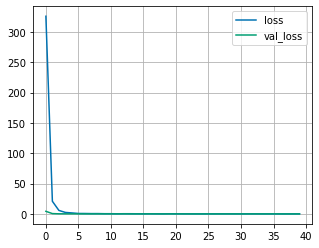

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32)

print('\n테스트 정확도:', test_acc)

IndentationError: ignored

# 임의 경기 예측

In [ ]:
# 블루팀이 이긴 경기 데이터
predictions = model.predict([[60243,41072,19,44218,37136,8,1]] )

In [ ]:
predictions[0]

array([0.99835336], dtype=float32)

블루팀이 이겻을 것으로 예측 // 1에 가깝기 때문에

In [ ]:
!apt update
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
import re, pathlib, shutil
# Get a list of all your Notebooks
notebooks = [x for x in pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks").iterdir() if 
             re.search(r"aix.ipynb", x.name, flags = re.I)]
for i, n in enumerate(notebooks):
    print(f"\nProcessing  [{i+1:{len(str(len(notebooks)))}d}/{len(notebooks)}]  {n.name}\n")
    # Optionally copy your notebooks from gdrive to your vm
    shutil.copy(n, n.name)
    n = pathlib.Path(n.name)
    !jupyter nbconvert "{n.as_posix()}" --to slides --output "{n.stem.replace(" ", "_")}"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 88.7 kB in 2s (51.2 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state informati